In [2]:
import pandas as pd
data = pd.read_csv('BASE DATOS 1.csv')
data.head()

,Index,Country,Scope,Jurisdiction,Type of Law,Product Type,Application
0,1,Afghanistan,National,Afghanistan,Ban,Bag,Unknown
1,2,Albania,National,Albania,Ban,Bag,Unknown
2,3,Algeria,National,Algeria,Other,Bag,Import
3,4,Andorra,State,Andorra,Ban,Bag,Unknown
4,5,Antigua & Barbuda,National,Antigua & Barbuda,Ban,Bag,"Retail, Manufacture, Distribution, Import, Use"


Definimos las variables que van a ser necesarias para construir las visualizaciones.

In [3]:
country_column = 'Country'
type_of_law_column = 'Type of Law'
application_column = 'Application'

Tuve que dejar todos los datos de las variables en mayúscula, ya que habían datos en minúscula y otras en mayúscula, y se repetían en las vizualizaciones.

In [4]:
data[country_column]= data[country_column].str.capitalize()
data[type_of_law_column]= data[type_of_law_column].str.capitalize()
data[application_column]= data[application_column].str.capitalize()

Acontinuación, intentamos ordenar los datos correspondientes a la variable de aplicación. Dejamos que los datos que se repiten más de una vez aparezcan, y aquellos que se repiten solo una vez, los agrupamos en la categoría de "Otros".

In [5]:
combination_app = data.groupby(['Application']).size().reset_index(name='Cantidad')
combination_app
grafico = combination_app[combination_app["Cantidad"]>1]
otros = combination_app[combination_app["Cantidad"]==1]["Cantidad"].sum()

In [6]:
nueva_fila = {"Application": "otros", "Cantidad": otros}
grafico = grafico.append(nueva_fila, ignore_index=True)
grafico

<ipython-input-6-b51450d321af>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grafico = grafico.append(nueva_fila, ignore_index=True)


,Application,Cantidad
0,Government,14
1,Import,4
2,Manufacture,4
3,"Manufacture, import",4
4,"Manufacture, use",2
5,Restaurant,140
6,"Restaurant, retail",37
7,Retail,432
8,"Retail, manufacture",8
9,"Retail, manufacture, distribution, import",5


In [7]:
combination_coun = data.groupby(['Country']).size().reset_index(name='cantidad')
combination_coun

,Country,cantidad
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,Andorra,1
4,Antigua & barbuda,1
...,...,...
142,Uzbekistan,1
143,Vanuatu,1
144,Vietnam,2
145,Yemen,1


Ponemos sólo los países que se repitan más de tres veces.

In [8]:
min_count = 3
combination_coun_filtered = combination_coun[combination_coun['cantidad'] >= min_count]
print(combination_coun_filtered)

            Country  cantidad
5         Argentina         6
7         Australia        12
18           Brazil         4
25           Canada        25
29            Chile         4
47           France         4
59         Honduras         3
62            India        13
63        Indonesia         7
94          Myanmar         3
98      New zealand         3
104        Pakistan         4
109     Philippines        38
130          Taiwan         3
139  United kingdom        10
140   United states       677


Creamos la variable de "repetidos", correspondiente a los países que se repiten.

In [9]:
repetidos = data[data["Country"].isin(combination_coun_filtered["Country"])]
repetidos

,Index,Country,Scope,Jurisdiction,Type of Law,Product Type,Application
5,6,Argentina,Local,Buenos Aires City,Ban,Bag,Unknown
6,7,Argentina,Local,El Bolson,Ban,Bag,Retail
7,8,Argentina,Local,El Calafate,Ban,Bag,Unknown
8,9,Argentina,State,Buenos Aires Province,Ban,Bag,Retail
9,10,Argentina,State,Chubut Province,Ban,Bag,Retail
...,...,...,...,...,...,...,...
949,982,United states,Territory,American Samoa,Ban,Bag,Retail
950,983,United states,Territory,Guam,Ban,Bag,Retail
951,984,United states,Territory,Northern Mariana Islands,Ban,Bag,Retail
952,985,United states,Territory,Puerto Rico,Ban,Bag,Retail


Creamos las siguientes variables para poder hacer la visualización, combinando los tipos de leyes con los países.

In [10]:
paises_con_ban = repetidos[repetidos["Type of Law"]=="Ban"].groupby("Country").count()["Type of Law"].reset_index()
paises_con_fee = repetidos[repetidos["Type of Law"]=="Fee"].groupby("Country").count()["Type of Law"].reset_index()
paises_con_banfee = repetidos[repetidos["Type of Law"]=="Ban+Fee"].groupby("Country").count()["Type of Law"].reset_index()

In [11]:
paises_con_ban["Tipo de ley"] = "Ban"
paises_con_fee["Tipo de ley"] = "Fee"
paises_con_banfee["Tipo de ley"] = "Ban+Fee"

Ponemos los datos que vamos a usar para el gráfico.

In [12]:
datos = paises_con_ban.append(paises_con_fee, ignore_index=True).append(paises_con_banfee, ignore_index=True)
datos

<ipython-input-12-bf0a1674cb4c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datos = paises_con_ban.append(paises_con_fee, ignore_index=True).append(paises_con_banfee, ignore_index=True)


,Country,Type of Law,Tipo de ley
0,Argentina,6,Ban
1,Australia,8,Ban
2,Brazil,4,Ban
3,Canada,21,Ban
4,Chile,4,Ban
5,France,4,Ban
6,Honduras,3,Ban
7,India,13,Ban
8,Indonesia,3,Ban
9,Myanmar,3,Ban


Ponemos los códigos para crear el gráfico.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


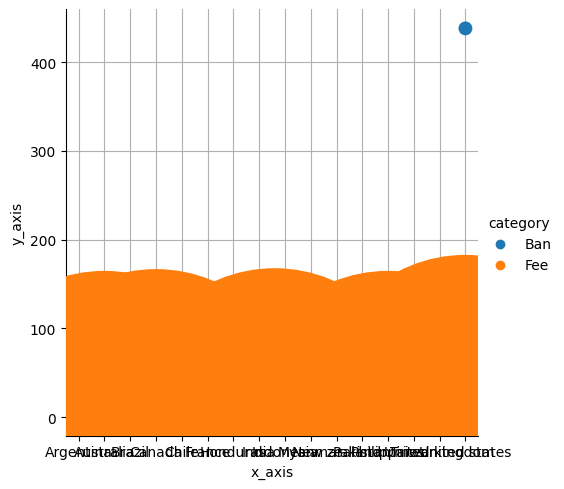

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# data
x= datos["Country"].tolist()
y= datos["Type of Law"].tolist()
z= datos["Tipo de ley"].tolist()

# create pandas dataframe
data_list = pd.DataFrame(
    {'x_axis': x,
     'y_axis': y,
     'category': z
    })

# change size of data points
minsize = min(data_list['y_axis'])
maxsize = max(data_list['y_axis'])

# scatter plot
sns.catplot(x="x_axis", y="y_axis", kind="swarm", hue="category",sizes=(minsize*100, maxsize*100), data=data_list)
plt.grid()

Definimos los ejes.

<Axes: xlabel='Type of Law', ylabel='Country'>

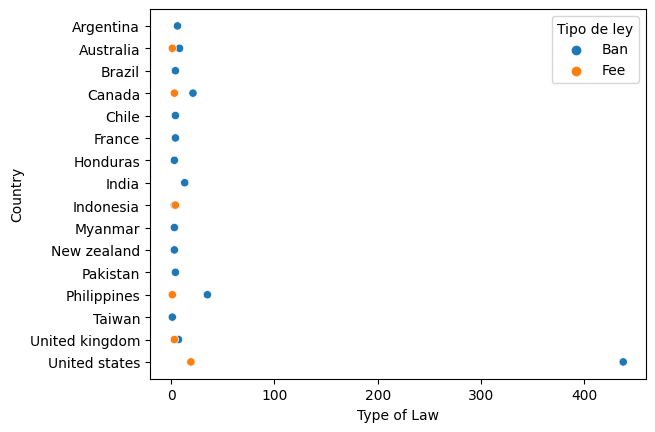

In [14]:
x= datos["Country"].tolist()
y= datos["Type of Law"].tolist()
z= datos["Tipo de ley"].tolist()
len(z)
sns.scatterplot(data=datos, x="Type of Law", y="Country", hue="Tipo de ley")

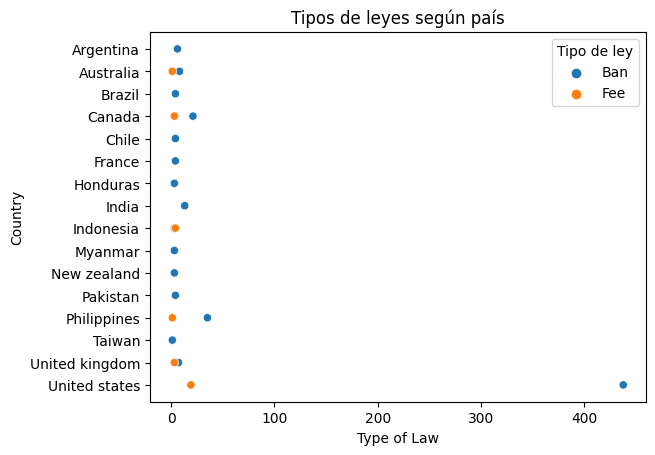

In [28]:
sns.scatterplot(data=datos, x="Type of Law", y="Country", hue="Tipo de ley")
plt.title('Tipos de leyes según país')
plt.xlabel('Type of Law')
plt.ylabel('Country')
plt.legend(title='Tipo de ley')
plt.savefig('scatter_plot.png')
plt.show()

Hacemos un resumen de los tipos de leyes que existen, y cuáles son más usadas.

In [15]:
combination_tl = data.groupby(['Type of Law']).size().reset_index(name='Cantidad')
combination_tl

,Type of Law,Cantidad
0,Ban,663
1,Ban+fee,233
2,Ban/fee hybrid,2
3,Comprehensive,2
4,Fee,53
5,Other,8


In [16]:
combination_tl = data.groupby(['Type of Law', 'Application']).size().reset_index(name='Cantidad')
min_count = 3
combination_tl_filtered = combination_tl[combination_tl['Cantidad'] >= min_count]
combination_tl_filtered

,Type of Law,Application,Cantidad
2,Ban,Government,14
5,Ban,Manufacture,3
8,Ban,"Manufacture, import",3
10,Ban,Restaurant,140
12,Ban,"Restaurant, retail",37
13,Ban,Retail,188
17,Ban,"Retail, manufacture",7
18,Ban,"Retail, manufacture, distribution, import",5
19,Ban,"Retail, manufacture, distribution, import, use",3
21,Ban,"Retail, manufacture, import, use",3


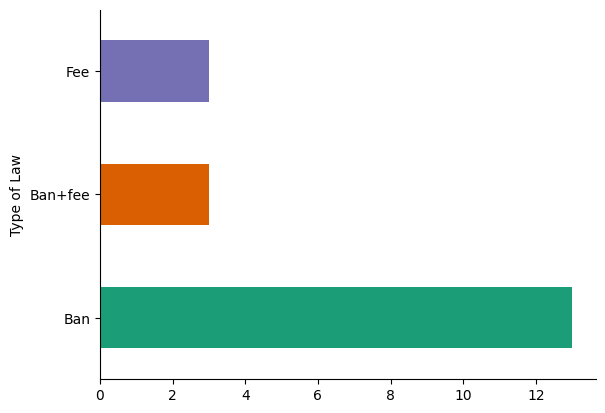

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
combination_tl_filtered.groupby('Type of Law').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

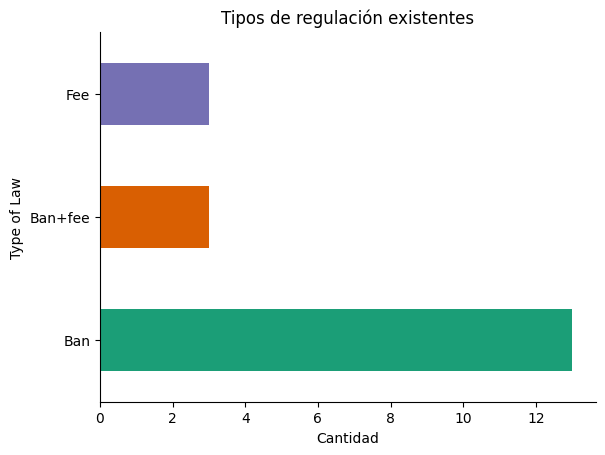

In [35]:
combination_tl_filtered.groupby('Type of Law').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Tipos de regulación existentes')
plt.xlabel('Cantidad')
plt.ylabel('Type of Law')
plt.savefig('horizontal_bar_plot.png')
plt.show()

Y de esta manera, logramos obtener dos visualizaciones que nos hablan sobre las legislaciones existentes en cuanto al uso de bolsas plásticas en diferentes países.